In [101]:
#Problem: 01

In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
%matplotlib inline

In [4]:
bank = pd.read_csv('bank_marketing_part1_Data-1.csv')

In [5]:
bank.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837


In [6]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   spending                      210 non-null    float64
 1   advance_payments              210 non-null    float64
 2   probability_of_full_payment   210 non-null    float64
 3   current_balance               210 non-null    float64
 4   credit_limit                  210 non-null    float64
 5   min_payment_amt               210 non-null    float64
 6   max_spent_in_single_shopping  210 non-null    float64
dtypes: float64(7)
memory usage: 11.6 KB


In [7]:
bank.duplicated().sum()

0

In [23]:
bank.dtypes

spending                        float64
advance_payments                float64
probability_of_full_payment     float64
current_balance                 float64
credit_limit                    float64
min_payment_amt                 float64
max_spent_in_single_shopping    float64
dtype: object

In [9]:
bank.isnull().sum()

spending                        0
advance_payments                0
probability_of_full_payment     0
current_balance                 0
credit_limit                    0
min_payment_amt                 0
max_spent_in_single_shopping    0
dtype: int64

In [12]:
bank.describe().T

,count,mean,std,min,25%,50%,75%,max
spending,210.0,14.847524,2.909699,10.5900,12.27000,14.35500,17.305000,21.1800
advance_payments,210.0,14.559286,1.305959,12.4100,13.45000,14.32000,15.715000,17.2500
probability_of_full_payment,210.0,0.870999,0.023629,0.8081,0.85690,0.87345,0.887775,0.9183
current_balance,210.0,5.628533,0.443063,4.8990,5.26225,5.52350,5.979750,6.6750
credit_limit,210.0,3.258605,0.377714,2.6300,2.94400,3.23700,3.561750,4.0330
min_payment_amt,210.0,3.700201,1.503557,0.7651,2.56150,3.59900,4.768750,8.4560
max_spent_in_single_shopping,210.0,5.408071,0.491480,4.5190,5.04500,5.22300,5.877000,6.5500


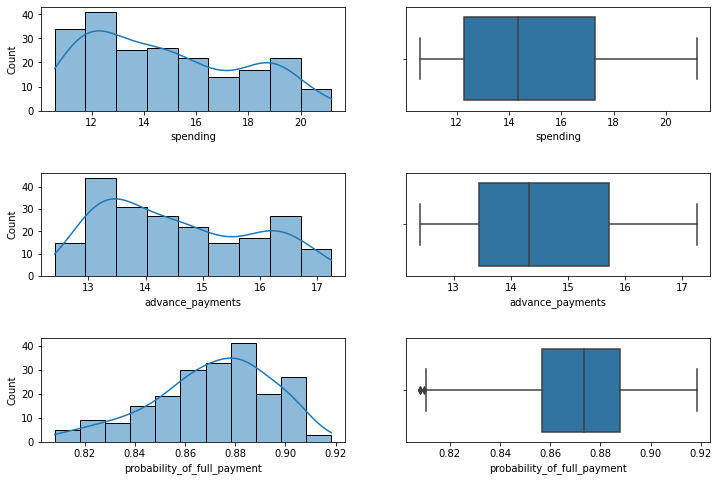

In [18]:
fig, axes = plt.subplots(nrows=3,ncols=2)
fig.set_size_inches(12,8)
sns.histplot(bank['spending'], kde=True, ax=axes[0][0])
sns.boxplot(x='spending', data=bank, ax=axes[0][1])
sns.histplot(bank['advance_payments'] , kde=True, ax=axes[1][0])
sns.boxplot(x='advance_payments', data=bank , ax=axes[1][1])
sns.histplot(bank['probability_of_full_payment'] , kde=True, ax=axes[2][0])
sns.boxplot(x='probability_of_full_payment', data=bank , ax=axes[2][1])
plt.subplots_adjust(hspace=0.6)

plt.show()

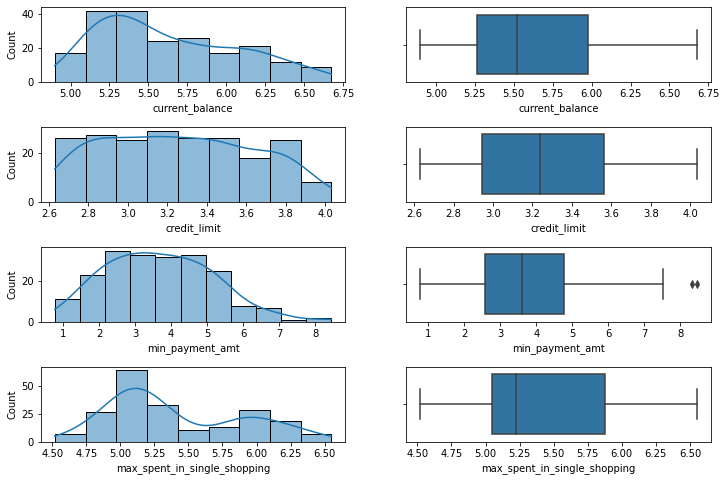

In [19]:
fig, axes = plt.subplots(nrows=4,ncols=2)
fig.set_size_inches(12,8)
sns.histplot(bank['current_balance'], kde=True, ax=axes[0][0])
sns.boxplot(x='current_balance', data=bank, ax=axes[0][1])
sns.histplot(bank['credit_limit'] , kde=True, ax=axes[1][0])
sns.boxplot(x='credit_limit', data=bank , ax=axes[1][1])
sns.histplot(bank['min_payment_amt'] , kde=True, ax=axes[2][0])
sns.boxplot(x='min_payment_amt', data=bank , ax=axes[2][1])
sns.histplot(bank['max_spent_in_single_shopping'] , kde=True, ax=axes[3][0])
sns.boxplot(x='max_spent_in_single_shopping', data=bank , ax=axes[3][1])

plt.subplots_adjust(hspace=0.6)

plt.show()

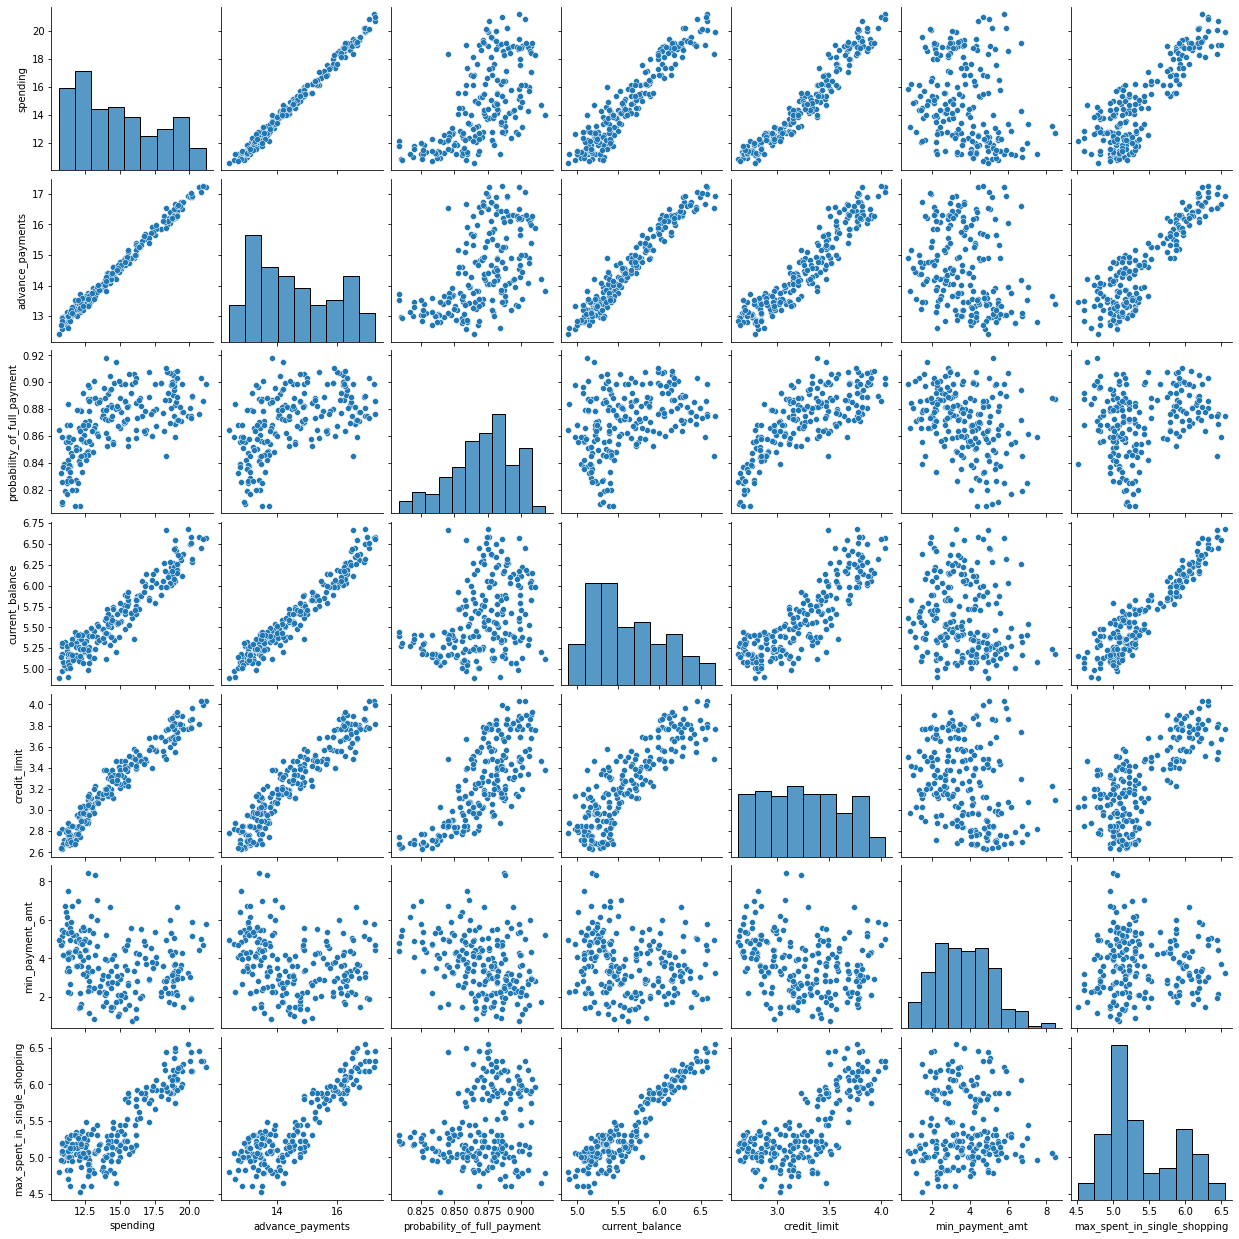

In [20]:
sns.pairplot(bank)

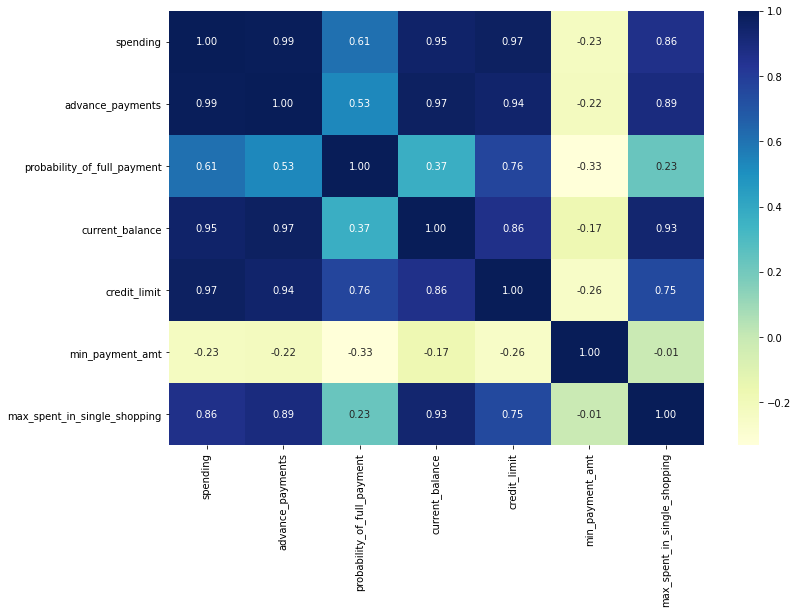

In [21]:
plt.figure(figsize=(12,8))
sns.heatmap(bank.corr(), annot=True, cmap='YlGnBu', fmt='.2f')
plt.show()

In [24]:
#Method 1:
from sklearn.preprocessing import StandardScaler


In [27]:
sc=StandardScaler()

In [28]:
scaled_bank = sc.fit_transform(bank)

In [29]:
scaled_bank

array([[ 1.75435461,  1.81196782,  0.17822987, ...,  1.33857863,
        -0.29880602,  2.3289982 ],
       [ 0.39358228,  0.25383997,  1.501773  , ...,  0.85823561,
        -0.24280501, -0.53858174],
       [ 1.41330028,  1.42819249,  0.50487353, ...,  1.317348  ,
        -0.22147129,  1.50910692],
       ...,
       [-0.2816364 , -0.30647202,  0.36488339, ..., -0.15287318,
        -1.3221578 , -0.83023461],
       [ 0.43836719,  0.33827054,  1.23027698, ...,  0.60081421,
        -0.95348449,  0.07123789],
       [ 0.24889256,  0.45340314, -0.77624835, ..., -0.07325831,
        -0.70681338,  0.96047321]])

In [32]:
scaled_bank = pd.DataFrame(scaled_bank, columns = bank.columns)

In [33]:
scaled_bank.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,1.754355,1.811968,0.178230,2.367533,1.338579,-0.298806,2.328998
1,0.393582,0.253840,1.501773,-0.600744,0.858236,-0.242805,-0.538582
2,1.413300,1.428192,0.504874,1.401485,1.317348,-0.221471,1.509107
3,-1.384034,-1.227533,-2.591878,-0.793049,-1.639017,0.987884,-0.454961
4,1.082581,0.998364,1.196340,0.591544,1.155464,-1.088154,0.874813


In [34]:
scaled_bank.describe().T

,count,mean,std,min,25%,50%,75%,max
spending,210.0,9.148766e-16,1.002389,-1.466714,-0.887955,-0.169674,0.846599,2.181534
advance_payments,210.0,1.097006e-16,1.002389,-1.649686,-0.851433,-0.183664,0.887069,2.065260
probability_of_full_payment,210.0,1.243978e-15,1.002389,-2.668236,-0.598079,0.103993,0.711677,2.006586
current_balance,210.0,-1.089076e-16,1.002389,-1.650501,-0.828682,-0.237628,0.794595,2.367533
credit_limit,210.0,-2.994298e-16,1.002389,-1.668209,-0.834907,-0.057335,0.804496,2.055112
min_payment_amt,210.0,5.302637e-16,1.002389,-1.956769,-0.759148,-0.067469,0.712379,3.170590
max_spent_in_single_shopping,210.0,-1.935489e-15,1.002389,-1.813288,-0.740495,-0.377459,0.956394,2.328998


In [44]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [45]:
wardlink = linkage(scaled_bank, method = 'ward')

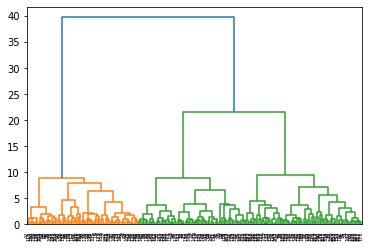

In [46]:
dend = dendrogram(wardlink)

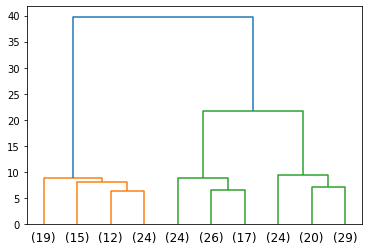

In [49]:
dend = dendrogram(wardlink,
                 truncate_mode= 'lastp',
                 p = 10,
                 )

In [53]:
from scipy.cluster.hierarchy import fcluster

In [54]:
clusters = fcluster(wardlink, 3, criterion = 'maxclust')
clusters

array([1, 3, 1, 2, 1, 2, 2, 3, 1, 2, 1, 3, 2, 1, 3, 2, 3, 2, 3, 2, 2, 2,
       1, 2, 3, 1, 3, 2, 2, 2, 3, 2, 2, 3, 2, 2, 2, 2, 2, 1, 1, 3, 1, 1,
       2, 2, 3, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 3, 2, 2, 3, 3, 1,
       1, 3, 1, 2, 3, 2, 1, 1, 2, 1, 3, 2, 1, 3, 3, 3, 3, 1, 2, 3, 3, 1,
       1, 2, 3, 1, 3, 2, 2, 1, 1, 1, 2, 1, 2, 1, 3, 1, 3, 1, 1, 2, 2, 1,
       3, 3, 1, 2, 2, 1, 3, 3, 2, 1, 3, 2, 2, 2, 3, 3, 1, 2, 3, 3, 2, 3,
       3, 1, 2, 1, 1, 2, 1, 3, 3, 3, 2, 2, 3, 2, 1, 2, 3, 2, 3, 2, 3, 3,
       3, 3, 3, 2, 3, 1, 1, 2, 1, 1, 1, 2, 1, 3, 3, 3, 3, 2, 3, 1, 1, 1,
       3, 3, 1, 2, 3, 3, 3, 3, 1, 1, 3, 3, 3, 2, 3, 3, 2, 1, 3, 1, 1, 2,
       1, 2, 3, 1, 3, 2, 1, 3, 1, 3, 1, 3], dtype=int32)

In [56]:
dclusters = fcluster(wardlink, 10, criterion = 'distance')
dclusters

array([1, 3, 1, 2, 1, 2, 2, 3, 1, 2, 1, 3, 2, 1, 3, 2, 3, 2, 3, 2, 2, 2,
       1, 2, 3, 1, 3, 2, 2, 2, 3, 2, 2, 3, 2, 2, 2, 2, 2, 1, 1, 3, 1, 1,
       2, 2, 3, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 3, 2, 2, 3, 3, 1,
       1, 3, 1, 2, 3, 2, 1, 1, 2, 1, 3, 2, 1, 3, 3, 3, 3, 1, 2, 3, 3, 1,
       1, 2, 3, 1, 3, 2, 2, 1, 1, 1, 2, 1, 2, 1, 3, 1, 3, 1, 1, 2, 2, 1,
       3, 3, 1, 2, 2, 1, 3, 3, 2, 1, 3, 2, 2, 2, 3, 3, 1, 2, 3, 3, 2, 3,
       3, 1, 2, 1, 1, 2, 1, 3, 3, 3, 2, 2, 3, 2, 1, 2, 3, 2, 3, 2, 3, 3,
       3, 3, 3, 2, 3, 1, 1, 2, 1, 1, 1, 2, 1, 3, 3, 3, 3, 2, 3, 1, 1, 1,
       3, 3, 1, 2, 3, 3, 3, 3, 1, 1, 3, 3, 3, 2, 3, 3, 2, 1, 3, 1, 1, 2,
       1, 2, 3, 1, 3, 2, 1, 3, 1, 3, 1, 3], dtype=int32)

In [57]:
bank['hclusters'] = clusters

In [58]:
bank.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,hclusters
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550,1
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144,3
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148,1
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185,2
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837,1


In [60]:
bank['hclusters'].value_counts()

3    73
1    70
2    67
Name: hclusters, dtype: int64

In [61]:
bank.to_csv('bank_H.csv')

In [62]:
from sklearn.cluster import KMeans

In [63]:
#Custers =2
k_means = KMeans(n_clusters = 2)
k_means.fit(scaled_bank)

KMeans(n_clusters=2)

In [78]:
labels2 = k_means.labels_
labels2

array([1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1])

In [65]:
k_means.inertia_

659.1717544870411

In [73]:
k_means3 = KMeans(n_clusters=3)
k_means3 = k_means3.fit(scaled_bank)

In [74]:
k_means3.inertia_

430.65897315130064

In [77]:
labels3 = k_means3.labels_
labels3

array([2, 0, 2, 1, 2, 1, 1, 0, 2, 1, 2, 0, 1, 2, 0, 1, 0, 1, 1, 1, 1, 1,
       2, 1, 0, 2, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2,
       1, 1, 0, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 1, 1, 2, 0, 1, 1, 0, 0, 2,
       2, 0, 2, 1, 0, 1, 2, 2, 1, 2, 0, 1, 2, 0, 0, 0, 0, 2, 1, 0, 2, 0,
       2, 1, 0, 2, 0, 1, 1, 2, 2, 2, 1, 2, 0, 2, 0, 2, 0, 2, 2, 1, 1, 2,
       0, 0, 2, 1, 1, 2, 0, 0, 1, 2, 0, 1, 1, 1, 0, 0, 2, 1, 0, 0, 1, 0,
       0, 2, 1, 2, 2, 1, 2, 0, 0, 0, 1, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 2, 2, 1, 2, 2, 2, 1, 0, 0, 0, 1, 0, 1, 0, 2, 2, 2,
       0, 1, 0, 1, 0, 0, 0, 0, 2, 2, 1, 0, 0, 1, 1, 0, 1, 2, 0, 2, 2, 1,
       2, 1, 0, 2, 0, 1, 2, 0, 2, 0, 0, 0])

In [82]:
k_means4 = KMeans(n_clusters=4)
k_means4 = k_means4.fit(scaled_bank)

In [84]:
k_means4.inertia_

371.6531439995162

In [87]:
labels4 = k_means4.labels_
labels4

array([1, 0, 1, 2, 1, 2, 2, 0, 1, 2, 1, 0, 2, 1, 0, 2, 0, 2, 0, 2, 2, 2,
       1, 2, 0, 3, 0, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2, 1, 1, 0, 3, 1,
       2, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 3, 2, 2, 2, 1, 0, 2, 2, 3, 0, 1,
       1, 0, 1, 0, 0, 2, 1, 1, 2, 1, 0, 2, 3, 0, 0, 0, 0, 1, 2, 3, 3, 3,
       3, 2, 0, 1, 0, 2, 0, 1, 1, 3, 2, 3, 0, 1, 0, 1, 0, 1, 1, 2, 0, 1,
       3, 0, 1, 2, 2, 3, 0, 0, 2, 1, 0, 2, 2, 2, 0, 0, 1, 2, 0, 0, 2, 0,
       0, 1, 2, 3, 1, 2, 3, 0, 3, 0, 2, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 3,
       2, 0, 0, 2, 0, 3, 1, 2, 1, 3, 1, 2, 3, 0, 0, 2, 0, 2, 0, 1, 1, 1,
       0, 0, 3, 2, 0, 0, 0, 0, 3, 3, 0, 3, 0, 2, 0, 0, 2, 1, 0, 3, 1, 2,
       1, 2, 0, 3, 0, 2, 3, 0, 3, 0, 3, 3])

In [69]:
ws = []

In [71]:
for i in range(1,11):
    KM = KMeans(n_clusters=i)
    KM.fit(scaled_bank)
    ws.append(KM.inertia_)

C:\Users\bicky\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [72]:
ws

[1469.9999999999995,
 659.1717544870411,
 430.65897315130064,
 371.2419306631327,
 326.30618276116064,
 289.45180519476133,
 262.2901682455943,
 242.39953578126207,
 221.1217228807945,
 204.8921805586704]

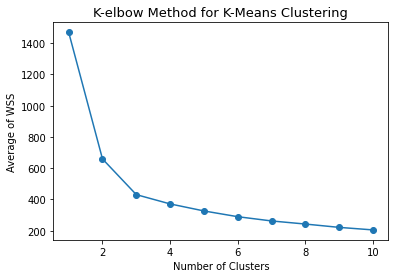

In [430]:
plt.plot(range(1,11), ws, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Average of WSS')
plt.title('K-elbow Method for K-Means Clustering', fontsize=13)
plt.show()

In [79]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [80]:
silhouette_score(scaled_bank, labels3)

0.4007270552751298

In [81]:
silhouette_score(scaled_bank, labels2)

0.46577247686580914

In [88]:
silhouette_score(scaled_bank, labels4)

0.3291966792017613

In [91]:
silwidth3 = silhouette_samples(scaled_bank, labels3)

In [92]:
silwidth3

array([0.57369874, 0.36638639, 0.63778363, 0.51245819, 0.36227633,
       0.21844638, 0.4728666 , 0.36181217, 0.52028453, 0.5325168 ,
       0.46759191, 0.13224116, 0.38966769, 0.5247812 , 0.11221528,
       0.22129574, 0.33795723, 0.49990157, 0.03155344, 0.2357566 ,
       0.35903729, 0.36612754, 0.43277307, 0.26136159, 0.47570507,
       0.06575223, 0.2717924 , 0.50389413, 0.55352814, 0.43430599,
       0.37707319, 0.42823997, 0.38827268, 0.39498208, 0.5345933 ,
       0.55628078, 0.50760384, 0.42334973, 0.50496507, 0.62241469,
       0.56053376, 0.48652307, 0.39923175, 0.61098901, 0.51352958,
       0.37606912, 0.30715373, 0.58258949, 0.48825724, 0.53403992,
       0.31448221, 0.49548458, 0.58601272, 0.59926567, 0.61967102,
       0.23378798, 0.44189877, 0.5384123 , 0.57674252, 0.57696905,
       0.55410258, 0.51383032, 0.55412974, 0.28131787, 0.49622138,
       0.56495699, 0.57828489, 0.5237842 , 0.63205238, 0.08288516,
       0.44353914, 0.32042362, 0.54187254, 0.58284321, 0.29226

In [93]:
silwidth2 = silhouette_samples(scaled_bank, labels2)
silwidth2

array([ 0.6037974 ,  0.00874752,  0.67803785,  0.49530556,  0.54807214,
        0.33977488,  0.58326925,  0.50325626,  0.58819046,  0.61589061,
        0.59569388,  0.34472282,  0.55860337,  0.58387274,  0.53716394,
        0.52744591,  0.10957153,  0.59242953,  0.55381269,  0.54872885,
        0.6160531 ,  0.47727965,  0.58383032,  0.56200063,  0.10101467,
        0.24988767,  0.48168779,  0.46959909,  0.56916779,  0.47686027,
        0.49562697,  0.61586637,  0.59000755,  0.01460085,  0.55546834,
        0.52173   ,  0.5396383 ,  0.55698092,  0.49870522,  0.6612224 ,
        0.63929387,  0.37565261,  0.51693827,  0.6436123 ,  0.49000343,
        0.59935435,  0.42278448,  0.64386191,  0.57615769,  0.63391341,
        0.57596349,  0.55913045,  0.6343461 ,  0.64292999,  0.67361298,
        0.44222908,  0.57219938,  0.57207891,  0.57322059,  0.61709902,
        0.30276434,  0.60285751,  0.60511045,  0.15250828,  0.29538619,
        0.6352326 ,  0.59897964,  0.38188293,  0.67505952,  0.58

In [94]:
bank['kclusters']=labels3

In [95]:
bank.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,hclusters,kclusters
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550,1,2
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144,3,0
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148,1,2
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185,2,1
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837,1,2


In [96]:
bank['kclusters'].value_counts().sort_index()

0    71
1    72
2    67
Name: kclusters, dtype: int64

In [97]:
#cluster profile for K-means 
clust_profile=bank.drop(['hclusters'],axis=1)
clust_profile=clust_profile.groupby('kclusters').mean()
clust_profile['freq']=bank.kclusters.value_counts().sort_index()
clust_profile

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,freq
kclusters,,,,,,,,
0,14.437887,14.337746,0.881597,5.514577,3.259225,2.707341,5.120803,71
1,11.856944,13.247778,0.848253,5.231750,2.849542,4.742389,5.101722,72
2,18.495373,16.203433,0.884210,6.175687,3.697537,3.632373,6.041701,67


In [425]:
clust = pd.read_csv('bank_H.csv', index_col=0)

In [426]:
clust.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,hclusters
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550,1
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144,3
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148,1
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185,2
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837,1


In [427]:
#Cluster profile for Hierarchial
clust_profile=clust.groupby('hclusters').mean()
clust_profile['freq']=clust.hclusters.value_counts().sort_index()
clust_profile

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,freq
hclusters,,,,,,,,
1,18.371429,16.145429,0.884400,6.158171,3.684629,3.639157,6.017371,70
2,11.872388,13.257015,0.848072,5.238940,2.848537,4.949433,5.122209,67
3,14.199041,14.233562,0.879190,5.478233,3.226452,2.612181,5.086178,73


In [98]:
bank.to_csv('bank_H_K.csv')

In [100]:
#Problem: 02

In [382]:
df = pd.read_csv('insurance_part2_data-2.csv')

In [383]:
df.head()

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,C2B,Airlines,No,0.70,Online,7,2.51,Customised Plan,ASIA
1,36,EPX,Travel Agency,No,0.00,Online,34,20.00,Customised Plan,ASIA
2,39,CWT,Travel Agency,No,5.94,Online,3,9.90,Customised Plan,Americas
3,36,EPX,Travel Agency,No,0.00,Online,4,26.00,Cancellation Plan,ASIA
4,33,JZI,Airlines,No,6.30,Online,53,18.00,Bronze Plan,ASIA


In [384]:
df.shape

(3000, 10)

In [385]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           3000 non-null   int64  
 1   Agency_Code   3000 non-null   object 
 2   Type          3000 non-null   object 
 3   Claimed       3000 non-null   object 
 4   Commision     3000 non-null   float64
 5   Channel       3000 non-null   object 
 6   Duration      3000 non-null   int64  
 7   Sales         3000 non-null   float64
 8   Product Name  3000 non-null   object 
 9   Destination   3000 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 234.5+ KB


In [386]:
df.isnull().sum()

Age             0
Agency_Code     0
Type            0
Claimed         0
Commision       0
Channel         0
Duration        0
Sales           0
Product Name    0
Destination     0
dtype: int64

In [387]:
df.duplicated().sum()

139

In [388]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,3000.0,38.091000,10.463518,8.0,32.0,36.00,42.000,84.00
Commision,3000.0,14.529203,25.481455,0.0,0.0,4.63,17.235,210.21
Duration,3000.0,70.001333,134.053313,-1.0,11.0,26.50,63.000,4580.00
Sales,3000.0,60.249913,70.733954,0.0,20.0,33.00,69.000,539.00


In [389]:
df.Agency_Code.value_counts()

EPX    1365
C2B     924
CWT     472
JZI     239
Name: Agency_Code, dtype: int64

C:\Users\bicky\AppData\Roaming\Python\Python38\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Agency_Code', ylabel='count'>

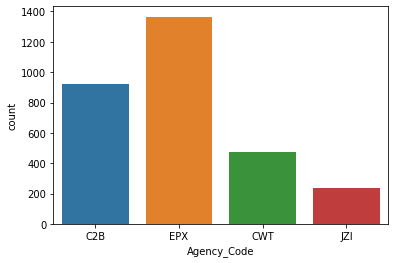

In [390]:
sns.countplot(df['Agency_Code'])

In [391]:
df.Claimed.value_counts()

No     2076
Yes     924
Name: Claimed, dtype: int64

C:\Users\bicky\AppData\Roaming\Python\Python38\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Claimed', ylabel='count'>

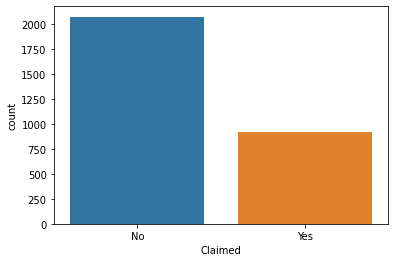

In [392]:
sns.countplot(df['Claimed'])

In [393]:
df.Channel.value_counts()

Online     2954
Offline      46
Name: Channel, dtype: int64

C:\Users\bicky\AppData\Roaming\Python\Python38\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Channel', ylabel='count'>

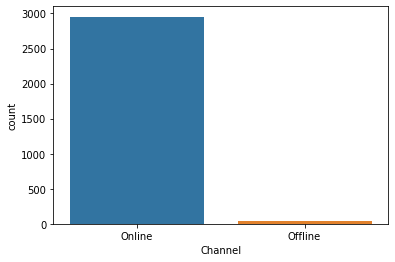

In [394]:
sns.countplot(df['Channel'])

In [395]:
df['Product Name'].value_counts()

Customised Plan      1136
Cancellation Plan     678
Bronze Plan           650
Silver Plan           427
Gold Plan             109
Name: Product Name, dtype: int64

C:\Users\bicky\AppData\Roaming\Python\Python38\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


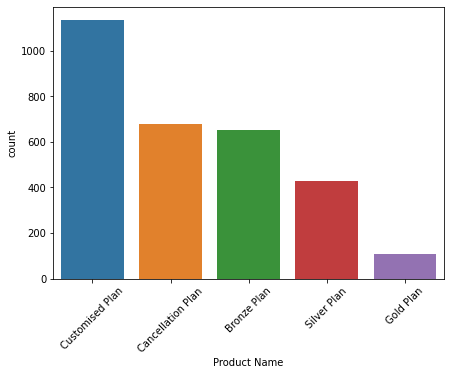

In [396]:
plt.figure(figsize=(7,5))
sns.countplot(df['Product Name'])
plt.xticks(rotation=45)
plt.show()

In [397]:
df.Destination.value_counts()

ASIA        2465
Americas     320
EUROPE       215
Name: Destination, dtype: int64

C:\Users\bicky\AppData\Roaming\Python\Python38\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Destination', ylabel='count'>

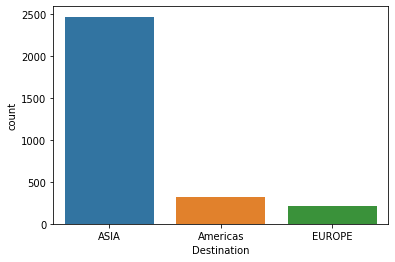

In [398]:
sns.countplot(df['Destination'])

In [399]:
pd.pivot_table(data = df, index = 'Claimed', columns = ['Product Name'], aggfunc = np.mean).T

Claimed                              No         Yes
          Product Name                             
Age       Bronze Plan         39.431078   36.792829
          Cancellation Plan   36.598425   35.000000
          Customised Plan     38.981859   37.311024
          Gold Plan           42.512821   41.571429
          Silver Plan         37.181818   38.019608
Commision Bronze Plan         11.040276   11.772271
          Cancellation Plan    0.141732    0.000000
          Customised Plan     10.649206   15.145157
          Gold Plan           62.384615   69.876000
          Silver Plan         27.640165   39.965523
Duration  Bronze Plan         34.882206   35.386454
          Cancellation Plan   39.529134   63.139535
          Customised Plan     50.081633   57.216535
          Gold Plan          145.666667  197.085714
          Silver Plan        136.809917  211.281046
Sales     Bronze Plan         35.400927   45.878167
          Cancellation Plan   31.702268   35.860465
          Customised Plan     43.605023   62.651693
          Gold Plan          158.398718  191.635714
          Silver Plan         99.282231  155.091667

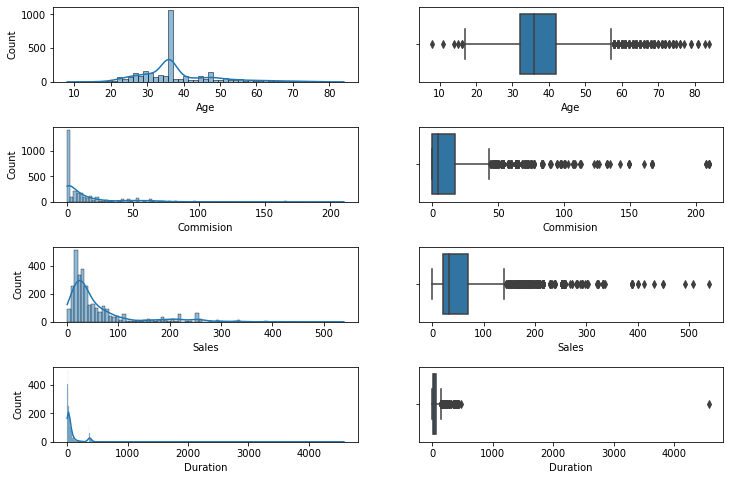

In [401]:
fig, axes = plt.subplots(nrows=4,ncols=2)
fig.set_size_inches(12,8)
sns.histplot(df['Age'], kde=True, ax=axes[0][0])
sns.boxplot(x='Age', data=df, ax=axes[0][1])
sns.histplot(df['Commision'] , kde=True, ax=axes[1][0])
sns.boxplot(x='Commision', data=df , ax=axes[1][1])
sns.histplot(df['Sales'] , kde=True, ax=axes[2][0])
sns.boxplot(x='Sales', data=df , ax=axes[2][1])
sns.histplot(df['Duration'] , kde=True, ax=axes[3][0])
sns.boxplot(x='Duration', data=df , ax=axes[3][1])
plt.subplots_adjust(hspace=0.6)

plt.show()

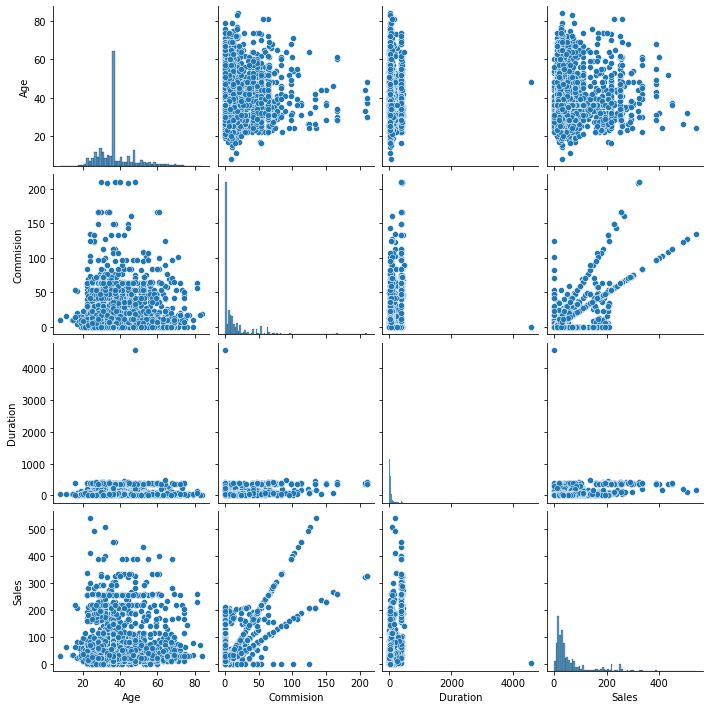

In [402]:
sns.pairplot(df)

<AxesSubplot:>

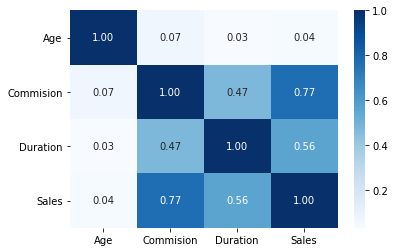

In [403]:
sns.heatmap(df.corr(), cmap='Blues', annot=True, fmt='.2f' )

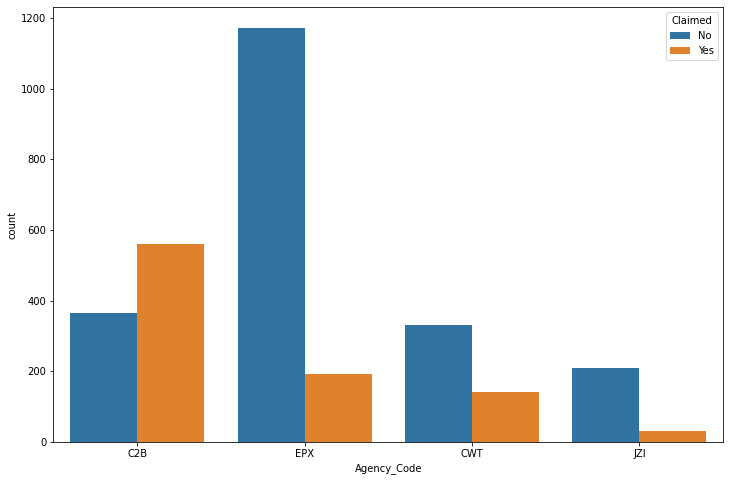

In [404]:
plt.figure(figsize=(12,8))
sns.countplot(x='Agency_Code',hue = 'Claimed', data= df);

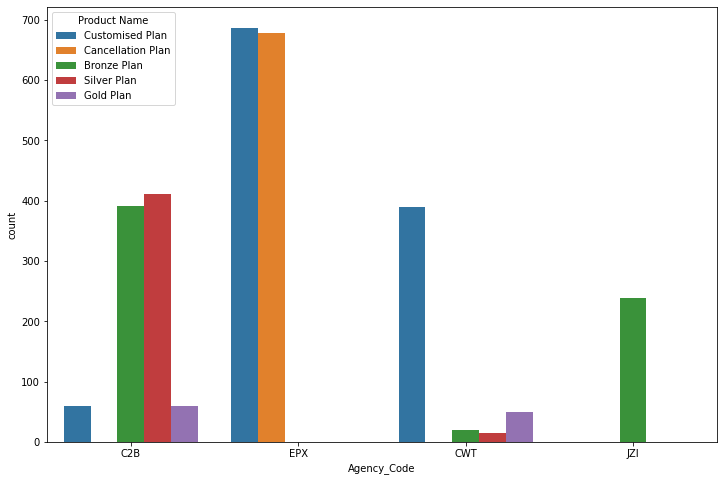

In [405]:
plt.figure(figsize=(12,8))
sns.countplot(x='Agency_Code',hue = 'Product Name', data= df);

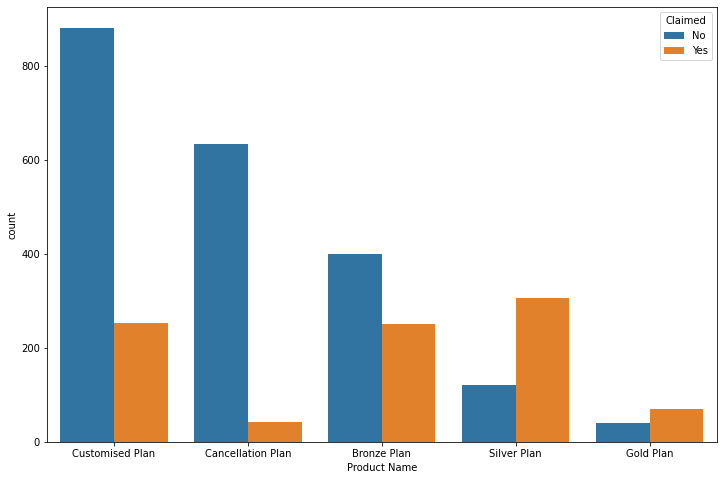

In [406]:
plt.figure(figsize=(12,8))
sns.countplot(x='Product Name',hue = 'Claimed', data= df);

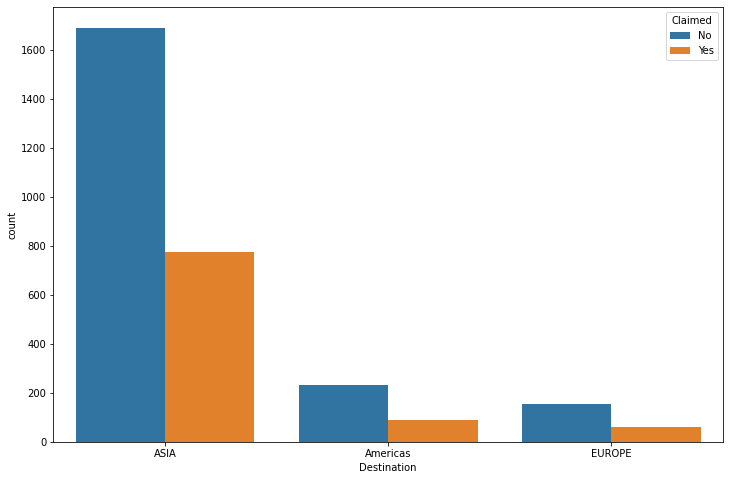

In [407]:
plt.figure(figsize=(12,8))
sns.countplot(x='Destination', hue='Claimed', data=df);

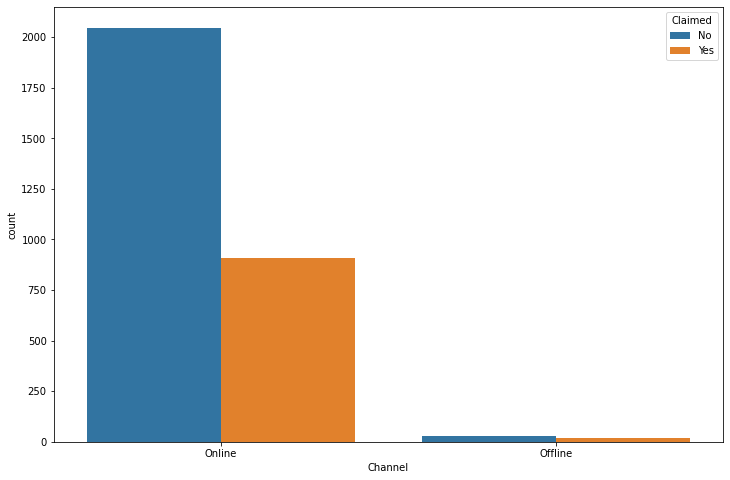

In [408]:
plt.figure(figsize=(12,8))
sns.countplot(x='Channel', hue='Claimed', data=df);

In [418]:
#One hot encoding
for feature in df.columns:
    if df[feature].dtype == 'object':
        df[feature]=pd.Categorical(df[feature]).codes
    

In [419]:
#independent and dependent variable
x = df.drop('Claimed', axis=1)
y = df.pop('Claimed')

In [420]:
x.head()

,Age,Agency_Code,Type,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,0,0,0.70,1,7,2.51,2,0
1,36,2,1,0.00,1,34,20.00,2,0
2,39,1,1,5.94,1,3,9.90,2,1
3,36,2,1,0.00,1,4,26.00,1,0
4,33,3,0,6.30,1,53,18.00,0,0


In [421]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Claimed, dtype: int8

In [159]:
#train and test data
from sklearn.model_selection import train_test_split
x_train, x_test, train_labels,test_labels = train_test_split(x, y, test_size = 0.3, random_state=0)

In [160]:
from sklearn.tree import DecisionTreeClassifier

In [162]:
dt_model = DecisionTreeClassifier(criterion='gini')

In [163]:
dt_model.fit(x_train, train_labels)

DecisionTreeClassifier()

In [165]:
from sklearn import tree

train_char_label = ['No','Yes']
HR_Tree_File = open('d:\data_tree.dot','w')
dot_data = tree.export_graphviz(dt_model, out_file=HR_Tree_File, feature_names = list(x_train), class_names = list(train_char_label))

HR_Tree_File.close()

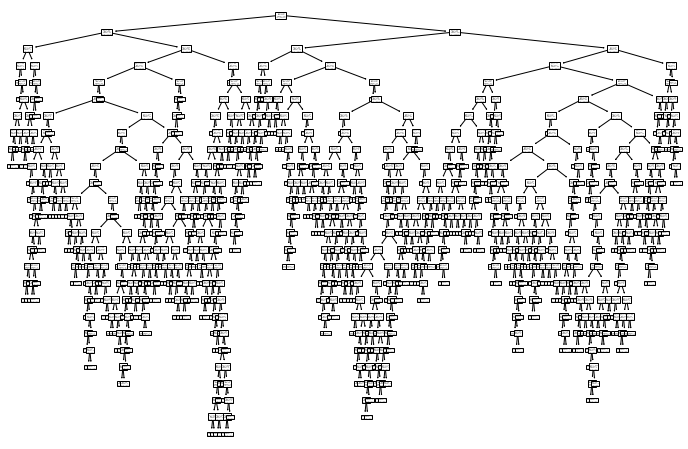

In [171]:
plt.figure(figsize=(12,8))
tree.plot_tree(dt_model);

In [173]:
print (pd.DataFrame(dt_model.feature_importances_, columns = ["Imp"], index = x_train.columns))

                   Imp
Age           0.185257
Agency_Code   0.175029
Type          0.001828
Commision     0.093981
Channel       0.004510
Duration      0.264968
Sales         0.210803
Product Name  0.043846
Destination   0.019778


In [174]:
from sklearn.model_selection import GridSearchCV

In [350]:
param_grid = {
    'max_depth': [ 7, 8, 9, 10, 11],
    'min_samples_leaf': [10, 15, 20, 25],
    'min_samples_split': [30, 45, 60, 75, 80]
}

dt_model = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator = dt_model, param_grid = param_grid, cv = 3)

In [432]:
grid_search.fit(x_train,train_labels)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [7, 8, 9, 10, 11],
                         'min_samples_leaf': [10, 15, 20, 25],
                         'min_samples_split': [30, 45, 60, 75, 80]})

In [249]:
grid_search.best_params_

{'max_depth': 7, 'min_samples_leaf': 15, 'min_samples_split': 75}

In [250]:
best_grid = grid_search.best_estimator_

In [352]:
print (pd.DataFrame(best_grid.feature_importances_, columns = ["Imp"], index = x_train.columns).sort_values('Imp', ascending=False))

                   Imp
Agency_Code   0.550452
Sales         0.274005
Product Name  0.089727
Duration      0.027699
Commision     0.025154
Age           0.024212
Destination   0.008751
Type          0.000000
Channel       0.000000


In [251]:
ytrain_predict = best_grid.predict(x_train)
ytest_predict = best_grid.predict(x_test)

In [252]:
from sklearn.metrics import classification_report, confusion_matrix

In [253]:
print(classification_report(train_labels,ytrain_predict))

              precision    recall  f1-score   support

           0       0.83      0.88      0.85      1464
           1       0.68      0.57      0.62       636

    accuracy                           0.79      2100
   macro avg       0.75      0.73      0.74      2100
weighted avg       0.78      0.79      0.78      2100



In [254]:
print(classification_report(test_labels,ytest_predict))

              precision    recall  f1-score   support

           0       0.80      0.90      0.85       612
           1       0.71      0.53      0.61       288

    accuracy                           0.78       900
   macro avg       0.75      0.72      0.73       900
weighted avg       0.77      0.78      0.77       900



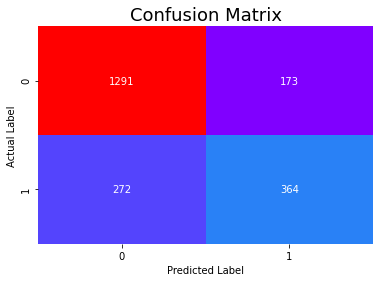

In [373]:
confusion_matrix(train_labels, ytrain_predict)
sns.heatmap(confusion_matrix(train_labels,ytrain_predict),annot=True, fmt='d',cbar=False, cmap='rainbow')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [347]:
best_grid.score(x_train, train_labels)

0.7880952380952381

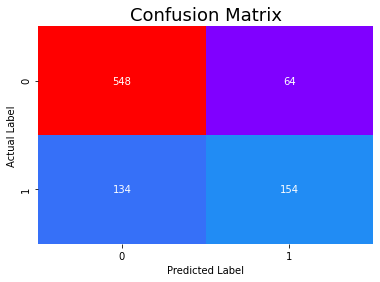

In [372]:
confusion_matrix(test_labels, ytest_predict)
sns.heatmap(confusion_matrix(test_labels,ytest_predict),annot=True, fmt='d',cbar=False, cmap='rainbow')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [348]:
best_grid.score(x_test, test_labels)

0.78

AUC: 0.837


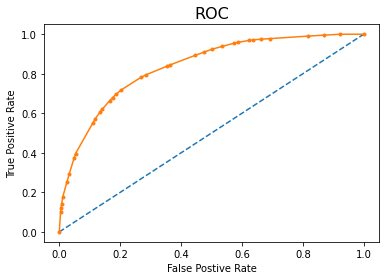

In [434]:
# AUC and ROC for the training data
probs = grid_search.predict_proba(x_train)
probs = probs[:, 1]

from sklearn.metrics import roc_auc_score
auc = roc_auc_score(train_labels, probs)
print('AUC: %.3f' % auc)

from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(train_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.xlabel('False Postive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC', fontsize=16)

plt.show()

AUC: 0.816


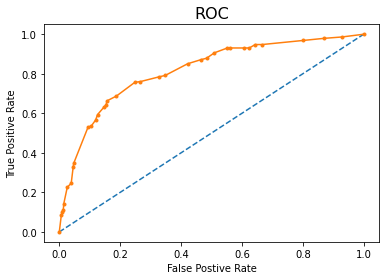

In [435]:
probs = grid_search.predict_proba(x_test)
probs = probs[:, 1]

from sklearn.metrics import roc_auc_score
auc = roc_auc_score(test_labels, probs)
print('AUC: %.3f' % auc)

from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(test_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.xlabel('False Postive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC', fontsize=16)

plt.show()

In [220]:
from sklearn.ensemble import RandomForestClassifier

In [269]:
from sklearn.model_selection import GridSearchCV

param_grid2 = {
    'max_depth': [6, 7, ],
    'max_features': [ 6, 7, ],
    'min_samples_leaf': [10, 15, 20],
    'min_samples_split': [30, 45, 60, 75],
    'n_estimators': [301, 401]
}

rfcl = RandomForestClassifier()

grid_search2 = GridSearchCV(estimator = rfcl, param_grid = param_grid2, cv = 3)

In [270]:
grid_search2.fit(x_train, train_labels)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [6, 7], 'max_features': [6, 7],
                         'min_samples_leaf': [10, 15, 20],
                         'min_samples_split': [30, 45, 60, 75],
                         'n_estimators': [301, 401]})

In [271]:
grid_search2.best_params_

{'max_depth': 7,
 'max_features': 6,
 'min_samples_leaf': 10,
 'min_samples_split': 30,
 'n_estimators': 301}

In [272]:
best_grid2 = grid_search2.best_estimator_

In [353]:
print (pd.DataFrame(best_grid2.feature_importances_, columns = ["Imp"], index = x_train.columns).sort_values('Imp', ascending=False))

                   Imp
Agency_Code   0.332647
Sales         0.204372
Product Name  0.203115
Commision     0.094150
Duration      0.083484
Age           0.061446
Destination   0.011582
Type          0.007992
Channel       0.001212


In [273]:
ytrain_predict2 = best_grid2.predict(x_train)
ytest_predict2 = best_grid2.predict(x_test)

In [274]:
print(classification_report(train_labels,ytrain_predict2))

              precision    recall  f1-score   support

           0       0.84      0.89      0.87      1464
           1       0.71      0.62      0.66       636

    accuracy                           0.81      2100
   macro avg       0.78      0.76      0.76      2100
weighted avg       0.80      0.81      0.80      2100



In [275]:
print(classification_report(test_labels,ytest_predict2))

              precision    recall  f1-score   support

           0       0.82      0.90      0.86       612
           1       0.73      0.59      0.66       288

    accuracy                           0.80       900
   macro avg       0.78      0.75      0.76       900
weighted avg       0.80      0.80      0.79       900



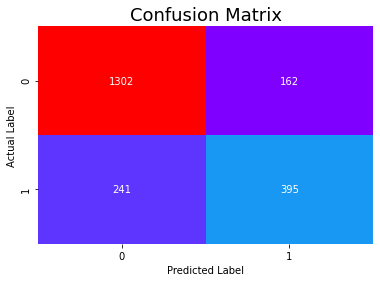

In [376]:
confusion_matrix(train_labels, ytrain_predict2)
sns.heatmap(confusion_matrix(train_labels,ytrain_predict2),annot=True, fmt='d',cbar=False, cmap='rainbow')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [362]:
best_grid2.score(x_train, train_labels)

0.8080952380952381

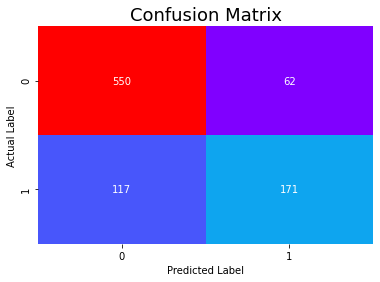

In [375]:
confusion_matrix(test_labels, ytest_predict2)
sns.heatmap(confusion_matrix(test_labels,ytest_predict2),annot=True, fmt='d',cbar=False, cmap='rainbow')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [367]:
best_grid2.score(x_test, test_labels)

0.8011111111111111

AUC: 0.863


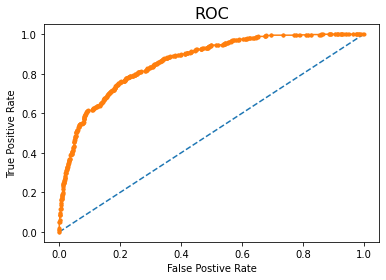

In [439]:
# AUC and ROC for the training data
probs2 = grid_search2.predict_proba(x_train)
probs2 = probs2[:, 1]

from sklearn.metrics import roc_auc_score
auc2 = roc_auc_score(train_labels, probs2)
print('AUC: %.3f' % auc2)

from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(train_labels, probs2)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.xlabel('False Postive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC', fontsize=16)

plt.show()

AUC: 0.863


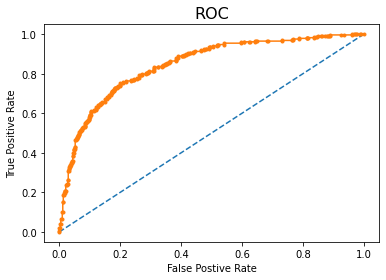

In [438]:
probs2 = grid_search2.predict_proba(x_test)
probs2 = probs2[:, 1]

from sklearn.metrics import roc_auc_score
auc = roc_auc_score(test_labels, probs2)
print('AUC: %.3f' % auc2)

from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(test_labels, probs2)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.xlabel('False Postive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC', fontsize=16)


plt.show()

In [281]:
#ANN
from sklearn.neural_network import MLPClassifier

In [282]:
from sklearn.preprocessing import StandardScaler 
sc = StandardScaler() 
X_trains = sc.fit_transform(x_train) 
X_tests = sc.transform (x_test)

In [335]:
param_grid3 = {
    'hidden_layer_sizes': [(300)],
    'activation': ['logistic', 'relu'],
    'solver': ['sgd'],
    'tol': [0.1,0.01],
    'max_iter' : [10000, 100000]
}

mlp = MLPClassifier()

grid_search3 = GridSearchCV(estimator = mlp, param_grid = param_grid3, cv = 3)

In [336]:
grid_search3.fit(X_trains, train_labels)

GridSearchCV(cv=3, estimator=MLPClassifier(),
             param_grid={'activation': ['logistic', 'relu'],
                         'hidden_layer_sizes': [300],
                         'max_iter': [10000, 100000], 'solver': ['sgd'],
                         'tol': [0.1, 0.01]})

In [337]:
grid_search3.best_params_

{'activation': 'relu',
 'hidden_layer_sizes': 300,
 'max_iter': 10000,
 'solver': 'sgd',
 'tol': 0.01}

In [338]:
best_grid3=grid_search3.best_estimator_

In [339]:
ytrain_predict3 = best_grid3.predict(X_trains)
ytest_predict3 = best_grid3.predict(X_tests)

In [340]:
print(classification_report(train_labels,ytrain_predict3))

              precision    recall  f1-score   support

           0       0.77      0.93      0.84      1464
           1       0.69      0.36      0.48       636

    accuracy                           0.76      2100
   macro avg       0.73      0.65      0.66      2100
weighted avg       0.75      0.76      0.73      2100



In [341]:
print(classification_report(test_labels,ytest_predict3))

              precision    recall  f1-score   support

           0       0.76      0.95      0.84       612
           1       0.78      0.35      0.48       288

    accuracy                           0.76       900
   macro avg       0.77      0.65      0.66       900
weighted avg       0.76      0.76      0.73       900



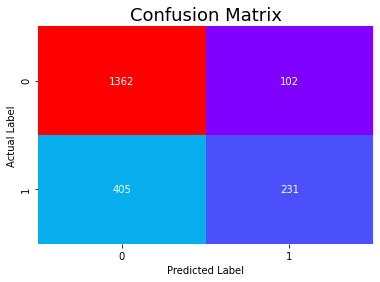

In [377]:
confusion_matrix(train_labels, ytrain_predict3)
sns.heatmap(confusion_matrix(train_labels,ytrain_predict3),annot=True, fmt='d',cbar=False, cmap='rainbow')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [359]:
best_grid3.score(X_trains, train_labels)

0.7585714285714286

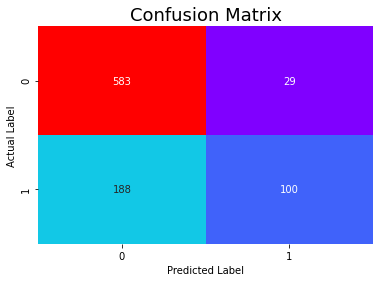

In [379]:
confusion_matrix(test_labels, ytest_predict3)
sns.heatmap(confusion_matrix(test_labels,ytest_predict3),annot=True, fmt='d',cbar=False, cmap='rainbow')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [360]:
best_grid3.score(X_tests, test_labels)

0.7588888888888888

AUC: 0.788


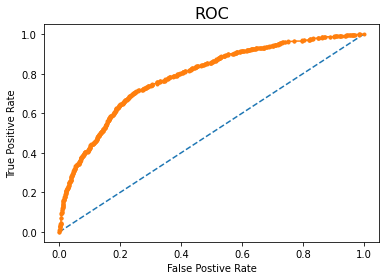

In [436]:
# AUC and ROC for the training data
probs3 = grid_search3.predict_proba(X_trains)
probs3 = probs3[:, 1]

from sklearn.metrics import roc_auc_score
auc3 = roc_auc_score(train_labels, probs3)
print('AUC: %.3f' % auc3)

from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(train_labels, probs3)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.xlabel('False Postive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC', fontsize=16)


plt.show()

AUC: 0.811


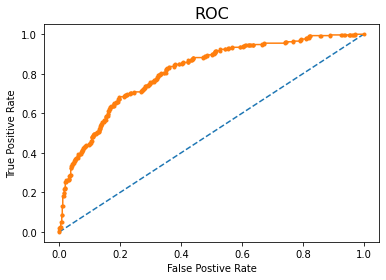

In [437]:
probs3 = grid_search3.predict_proba(X_tests)
probs3 = probs3[:, 1]

from sklearn.metrics import roc_auc_score
auc3 = roc_auc_score(test_labels, probs3)
print('AUC: %.3f' % auc3)

from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(test_labels, probs3)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.xlabel('False Postive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC', fontsize=16)

plt.show()